In [1]:
import json
from collections import Counter
from datetime import datetime

import seaborn
import pandas
import matplotlib.pyplot as plt
from IPython.display import HTML, display
import tabulate

## Read and prepare data

### JSON source

In [2]:
# parsers for dates

def parse_date(date):
    if not isinstance(date, str):
        return date
    if not date:
        return
    if date[-2:] == '00':
        return
    return datetime.strptime(date, '%Y-%m-%d').date()

def parse_year(date):
    if not isinstance(date, str):
        return date
    if not date:
        return
    if date == '0000':
        return
    return parse_date(date + '-12-10')

In [3]:
# read JSON
laureates = json.load(open('data.json'))['laureates']

In [4]:
# drop some empty records
laureates = [laureate for laureate in laureates if 'firstname' in laureate]

# convert dates and ints
for laureate in laureates:
    laureate['id'] = int(laureate['id'])
    for col in ('born', 'died'):
        laureate[col] = parse_date(laureate[col])
    for prize in laureate['prizes']:
        try:
            prize['share'] = int(prize['share'])
            prize['year'] = parse_year(prize['year'])
        except:
            print(laureate)

In [5]:
laureates[0]

{'id': 1,
 'firstname': 'Wilhelm Conrad',
 'surname': 'Röntgen',
 'born': datetime.date(1845, 3, 27),
 'died': datetime.date(1923, 2, 10),
 'bornCountry': 'Prussia (now Germany)',
 'bornCountryCode': 'DE',
 'bornCity': 'Lennep (now Remscheid)',
 'diedCountry': 'Germany',
 'diedCountryCode': 'DE',
 'diedCity': 'Munich',
 'gender': 'male',
 'prizes': [{'year': datetime.date(1901, 12, 10),
   'category': 'physics',
   'share': 1,
   'motivation': '"in recognition of the extraordinary services he has rendered by the discovery of the remarkable rays subsequently named after him"',
   'affiliations': [{'name': 'Munich University',
     'city': 'Munich',
     'country': 'Germany'}]}]}

### Laureates DataFrame

In [6]:
data = []
for laureate in laureates:
    line = laureate.copy()
    line['prizes'] = len(line['prizes'])
    data.append(line)
laureates_df = pandas.DataFrame(data)

# reorder cols
laureates_df = laureates_df[[
    'id', 'firstname', 'surname', 'gender', 'prizes',
    'born', 'bornCity', 'bornCountryCode', 'died', 'diedCity', 'diedCountryCode',
]]

In [7]:
laureates_df.head()

,id,firstname,surname,gender,prizes,born,bornCity,bornCountryCode,died,diedCity,diedCountryCode
0,1,Wilhelm Conrad,Röntgen,male,1,1845-03-27,Lennep (now Remscheid),DE,1923-02-10,Munich,DE
1,2,Hendrik Antoon,Lorentz,male,1,1853-07-18,Arnhem,NL,1928-02-04,NaN,NL
2,3,Pieter,Zeeman,male,1,1865-05-25,Zonnemaire,NL,1943-10-09,Amsterdam,NL
3,4,Antoine Henri,Becquerel,male,1,1852-12-15,Paris,FR,1908-08-25,NaN,FR
4,5,Pierre,Curie,male,1,1859-05-15,Paris,FR,1906-04-19,Paris,FR


### Prizes DataFrame

In [8]:
data = []
for laureate in laureates:
    for prize in laureate['prizes']:
        line = prize.copy()
        line.update(laureate)
        for col in ('affiliations', 'prizes', 'diedCountry', 'bornCountry', 'overallMotivation'):
            if col in line:
                del line[col]
        data.append(line)
prizes_df = pandas.DataFrame(data)

# reorder cols
prizes_df = prizes_df[[
    'id', 'firstname', 'surname', 'gender', 'year', 'category', 'share',
    'born', 'bornCity', 'bornCountryCode', 'died', 'diedCity', 'diedCountryCode',
]]

In [9]:
prizes_df.head()

,id,firstname,surname,gender,year,category,share,born,bornCity,bornCountryCode,died,diedCity,diedCountryCode
0,1,Wilhelm Conrad,Röntgen,male,1901-12-10,physics,1,1845-03-27,Lennep (now Remscheid),DE,1923-02-10,Munich,DE
1,2,Hendrik Antoon,Lorentz,male,1902-12-10,physics,2,1853-07-18,Arnhem,NL,1928-02-04,NaN,NL
2,3,Pieter,Zeeman,male,1902-12-10,physics,2,1865-05-25,Zonnemaire,NL,1943-10-09,Amsterdam,NL
3,4,Antoine Henri,Becquerel,male,1903-12-10,physics,2,1852-12-15,Paris,FR,1908-08-25,NaN,FR
4,5,Pierre,Curie,male,1903-12-10,physics,4,1859-05-15,Paris,FR,1906-04-19,Paris,FR


## Analyze

### Gender

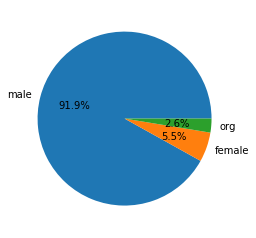

In [10]:
# start from pie
c = Counter([l['gender'] for l in laureates]).most_common()
plt.pie(x=list(zip(*c))[1], labels=list(zip(*c))[0], autopct='%1.1f%%')
plt.show()

In [11]:
HTML(tabulate.tabulate(c, tablefmt='html'))

male,853
female,51
org,24


In [12]:
# let's see women
laureates_df[laureates_df.gender == 'female'][['firstname', 'surname', 'prizes', 'born']]

,firstname,surname,prizes,born
5,Marie,"Curie, née Sklodowska",2,1867-11-07
77,Maria,Goeppert Mayer,1,1906-06-28
189,Irène,Joliot-Curie,1,1897-09-12
225,Dorothy Crowfoot,Hodgkin,1,1910-05-12
338,Gerty Theresa,"Cori, née Radnitz",1,1896-08-15
407,Rosalyn,Yalow,1,1921-07-19
422,Barbara,McClintock,1,1902-06-16
429,Rita,Levi-Montalcini,1,1909-04-22
432,Gertrude B.,Elion,1,1918-01-23
447,Christiane,Nüsslein-Volhard,1,1942-10-20


### Age

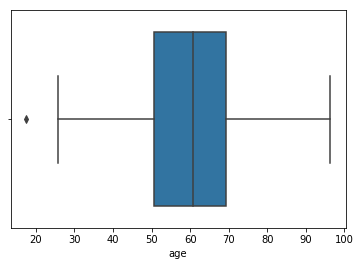

In [13]:
prizes_df['age'] = prizes_df.apply(lambda line: line['born'] and (line['year'] - line['born']).days / 365, axis='columns')
seaborn.boxplot(prizes_df['age'])

In [14]:
# sort by age
tmp = prizes_df.sort_values('age')
# drop nans
tmp = tmp[tmp['age'] > 0]

# youngest
tmp[['firstname', 'surname', 'category', 'age']].head()

,firstname,surname,category,age
887,Malala,Yousafzai,peace,17.424658
20,William Lawrence,Bragg,physics,25.709589
37,Werner Karl,Heisenberg,physics,31.035616
69,Tsung-Dao (T.D.),Lee,physics,31.065753
42,Carl David,Anderson,physics,31.290411


In [15]:
# oldest
tmp[['firstname', 'surname', 'category', 'age']].tail()

,firstname,surname,category,age
798,Doris,Lessing,literature,88.194521
737,Raymond,Davis Jr.,physics,88.216438
862,Lloyd S.,Shapley,economics,89.586301
801,Leonid,Hurwicz,economics,90.364384
925,Arthur,Ashkin,physics,96.336986


### Prizes

In [16]:
laureates_df[laureates_df['prizes'] > 1]

,id,firstname,surname,gender,prizes,born,bornCity,bornCountryCode,died,diedCity,diedCountryCode
5,6,Marie,"Curie, née Sklodowska",female,2,1867-11-07,Warsaw,PL,1934-07-04,Sallanches,FR
64,66,John,Bardeen,male,2,1908-05-23,"Madison, WI",US,1991-01-30,"Boston, MA",US
212,217,Linus Carl,Pauling,male,2,1901-02-28,"Portland, OR",US,1994-08-19,"Big Sur, CA",US
217,222,Frederick,Sanger,male,2,1918-08-13,Rendcombe,GB,2013-11-19,Cambridge,GB
475,482,Comité international de la Croix Rouge (Intern...,NaN,org,3,None,NaN,NaN,None,NaN,NaN
507,515,Office of the United Nations High Commissioner...,NaN,org,2,None,NaN,NaN,None,NaN,NaN


### Countries

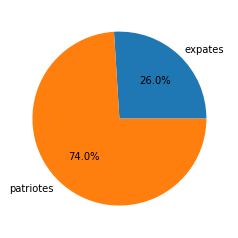

In [17]:
tmp = laureates_df[~laureates_df['diedCountryCode'].isnull()]
tmp = tmp[~tmp['bornCountryCode'].isnull()]

expates = tmp[tmp['diedCountryCode'] != tmp['bornCountryCode']]
patriotes = laureates_df[laureates_df['diedCountryCode'] != laureates_df['bornCountryCode']]

plt.pie(x=[len(expates), len(patriotes)], labels=['expates', 'patriotes'], autopct='%1.1f%%')
plt.show()

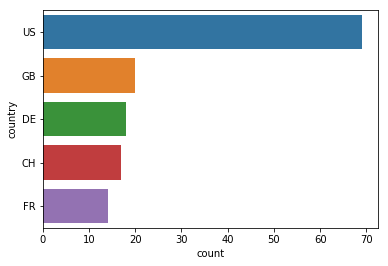

In [18]:
# top countries to work and die

c = Counter(expates['diedCountryCode']).most_common(5)
seaborn.barplot(data=pandas.DataFrame(c, columns=('country', 'count')), x='count', y='country')

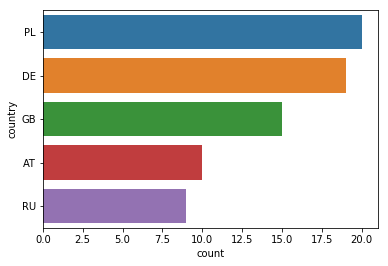

In [19]:
# top countries to leave

c = Counter(expates['bornCountryCode']).most_common(5)
seaborn.barplot(data=pandas.DataFrame(c, columns=('country', 'count')), x='count', y='country')

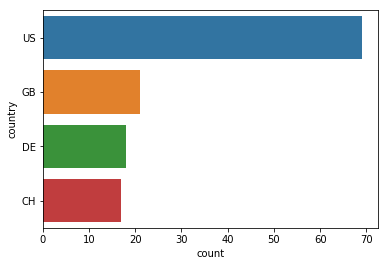

In [20]:
# top countries to never leave

c = Counter(patriotes['diedCountryCode']).most_common(5)
seaborn.barplot(data=pandas.DataFrame(c, columns=('country', 'count')), x='count', y='country')

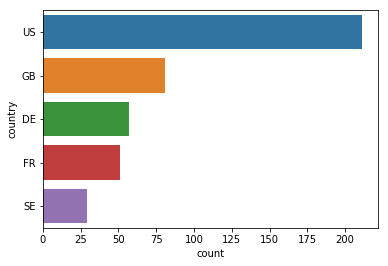

In [21]:
# top countries to get nobel prize

c = Counter(prizes_df[~prizes_df['diedCountryCode'].isnull()]['diedCountryCode']).most_common(5)
seaborn.barplot(data=pandas.DataFrame(c, columns=('country', 'count')), x='count', y='country')

## Clasterize

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [54]:
df = prizes_df.copy()
for col in ('bornCountryCode', 'diedCountryCode'):
    df[col] = pandas.factorize(df[col])[0]
df['diedAge'] = prizes_df.apply(lambda line: line['born'] and line['died'] and (line['died'] - line['born']).days / 365, axis='columns')


In [55]:
x = df[['bornCountryCode', 'diedCountryCode', 'age', 'diedAge']]

x['age'].interpolate(inplace=True)
x['diedAge'].interpolate(inplace=True)

for col in ('bornCountryCode', 'diedCountryCode'):
    x[col].fillna(x[col].mode()[0])

In [65]:
y = df['category']


# cross-validation gives similar accuracy to holdout, so we can use all dataset for training
# x_train = x
# y_train = y

x_train, x_holdout, y_train, y_holdout = train_test_split(x.values, y, test_size=0.3)

In [66]:
pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])
grid = GridSearchCV(pipe, {'knn__n_neighbors': range(1, 10)}, cv=5, n_jobs=-1)

In [67]:
grid.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'knn__n_neighbors': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [68]:
grid.best_params_, grid.best_score_

({'knn__n_neighbors': 4}, 0.2966360856269113)

In [69]:
accuracy_score(y_holdout, grid.predict(x_holdout))

0.31316725978647686

kNN classifier gives low accuracy. Of course, we can't get more data (however, we can analyze not only Nobel Prize winners). So, we need more features. Maybe, height, weight, university size, access to supercomputers etc can give much better result.